In [2]:
import pandas as pd
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs 

In [3]:
x1, y1= make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

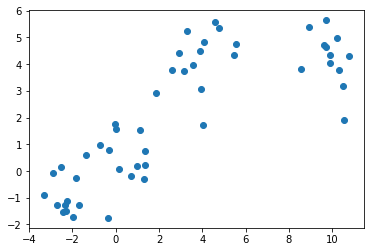

In [5]:
plt.scatter(x1[:,0], x1[:,1], marker="o")

In [6]:
agglom=AgglomerativeClustering(n_clusters=4, linkage="average")

In [8]:
print(agglom.fit(x1,y1))

AgglomerativeClustering(linkage='average', n_clusters=4)


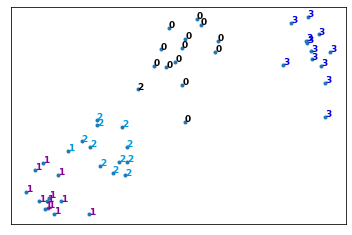

In [13]:
plt.figure(figsize=(6,4))


x_min, x_max = np.min(x1, axis=0), np.max(x1, axis=0)

x1 = (x1 - x_min) / (x_max - x_min)

for i in range(x1.shape[0]):
    plt.text(x1[i, 0], x1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])



plt.scatter(x1[:, 0], x1[:, 1], marker='.')
plt.show()

In [14]:
dist_matrix=distance_matrix(x1,x1)
print(dist_matrix)

[[0.         0.39583478 0.847185   ... 0.79530765 0.74417514 0.05518835]
 [0.39583478 0.         0.65009693 ... 0.50364169 0.49142115 0.41847704]
 [0.847185   0.65009693 0.         ... 0.23331076 0.17708948 0.82357615]
 ...
 [0.79530765 0.50364169 0.23331076 ... 0.         0.09002386 0.78655201]
 [0.74417514 0.49142115 0.17708948 ... 0.09002386 0.         0.73030959]
 [0.05518835 0.41847704 0.82357615 ... 0.78655201 0.73030959 0.        ]]


In [19]:
z=hierarchy.linkage(dist_matrix, "complete")

/tmp/ipykernel_9208/1562484636.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z=hierarchy.linkage(dist_matrix, "complete")


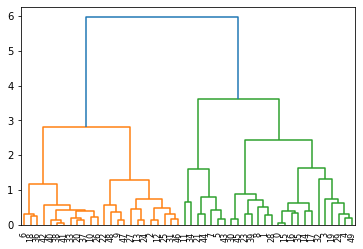

In [20]:
dendro=hierarchy.dendrogram(z)